### Changing K

In this notebook, you will get some practice with different values of **k**, and how it changes the clusters that are observed in the data.  As well as how to determine what the best value for **k** might be for a dataset.

To get started, let's read in our necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helpers2 as h
import tests as t
from IPython import display

%matplotlib inline

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [2]:
h.simulate_data?

In [3]:
data = h.simulate_data(200,5,4)# Create a dataset with 200 points, 5 features and 4 centers

# This will check that your dataset appears to match ours before moving forward
t.test_question_1(data)

Looks good!  Continue!


`2.` Because of how you set up the data, what should the value of **k** be?

In [4]:
k_value = 4  # What should the value of k be?

# Check your solution against ours.
t.test_question_2(k_value)

That's right!  The value of k is the same as the number of centroids used to create your dataset.


`3.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

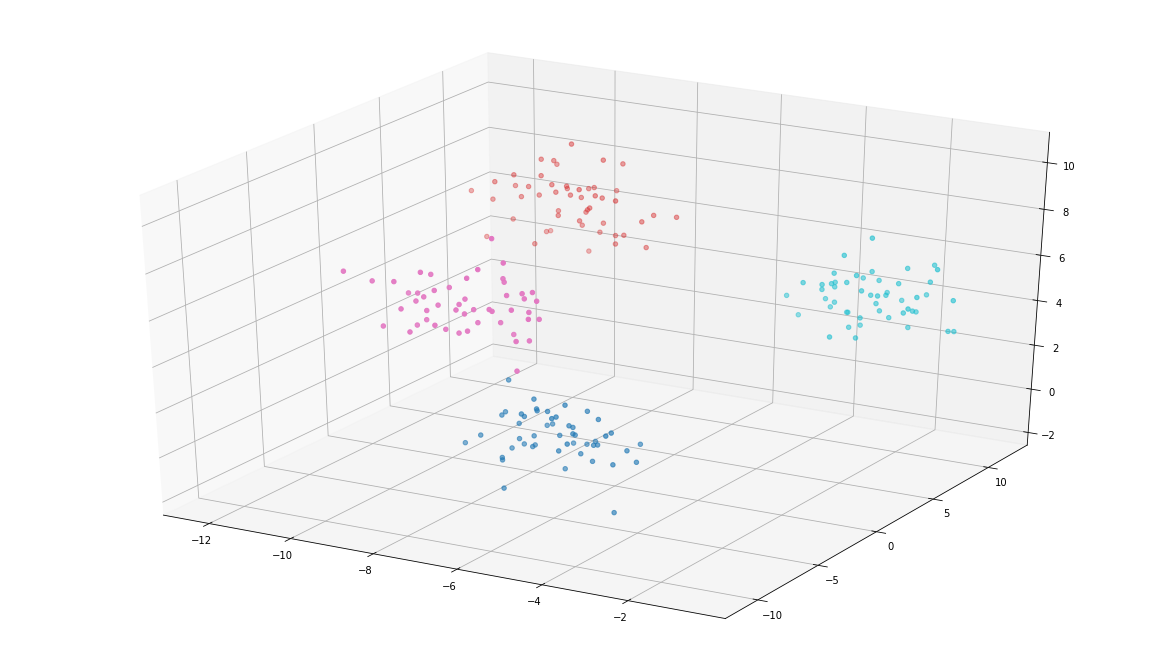

In [5]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)#instantiate your model

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(data)#fit the model to your data using kmeans_4

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(data)#predict labels using model_4 on your dataset

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_4)

`4.` Now try again, but this time fit kmeans using 2 clusters instead of 4 to your data.

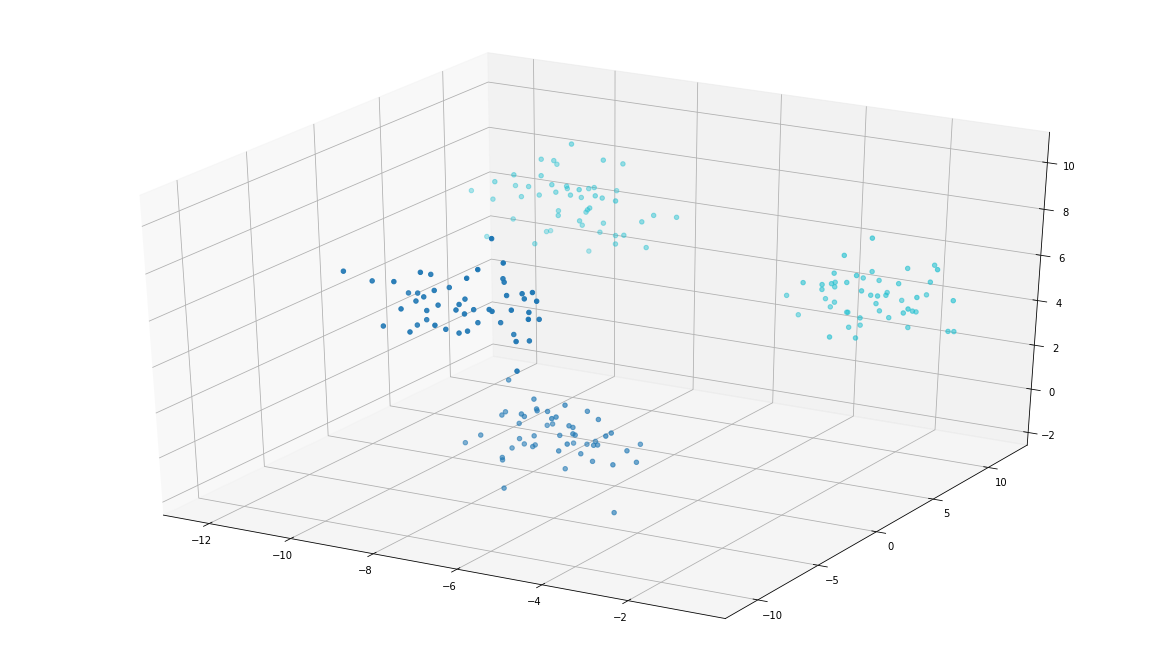

In [6]:
# Try instantiating a model with 2 centers
kmeans_2 = KMeans(n_clusters=2)

# Then fit the model to your data using the fit method
model_2 = kmeans_2.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_2 = model_2.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_2)

`5.` Now try one more time, but with the number of clusters in kmeans to 7.

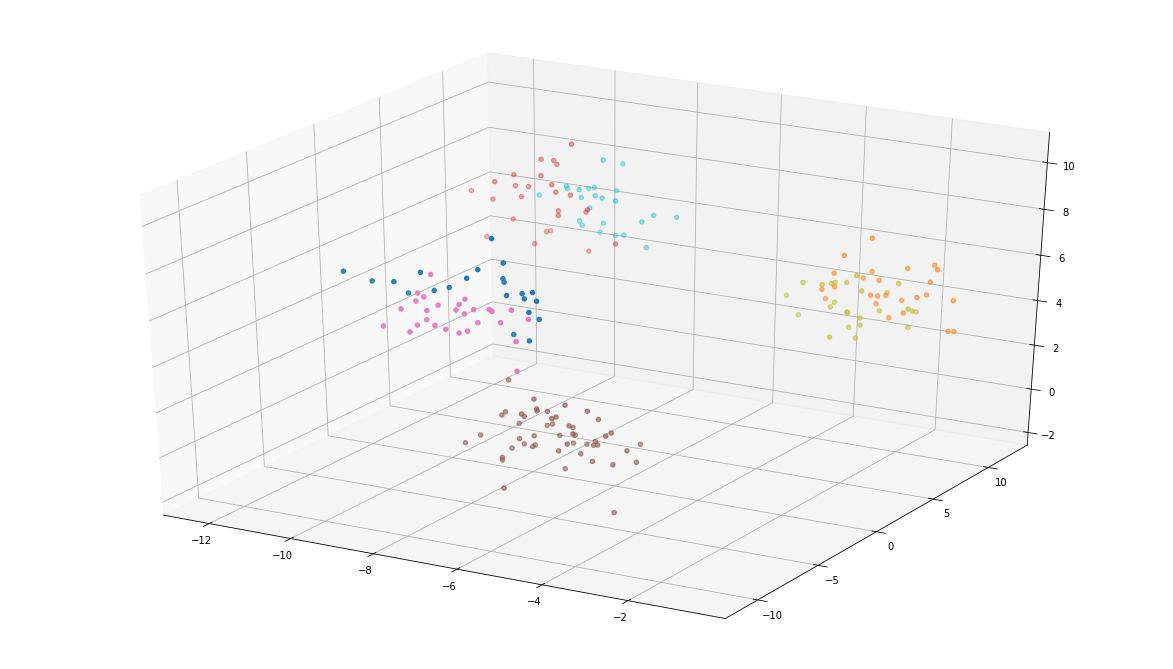

In [10]:
# Try instantiating a model with 7 centers
kmeans_7 = KMeans(n_clusters=7)

# Then fit the model to your data using the fit method
model_7 = kmeans_7.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_7 = model_7.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

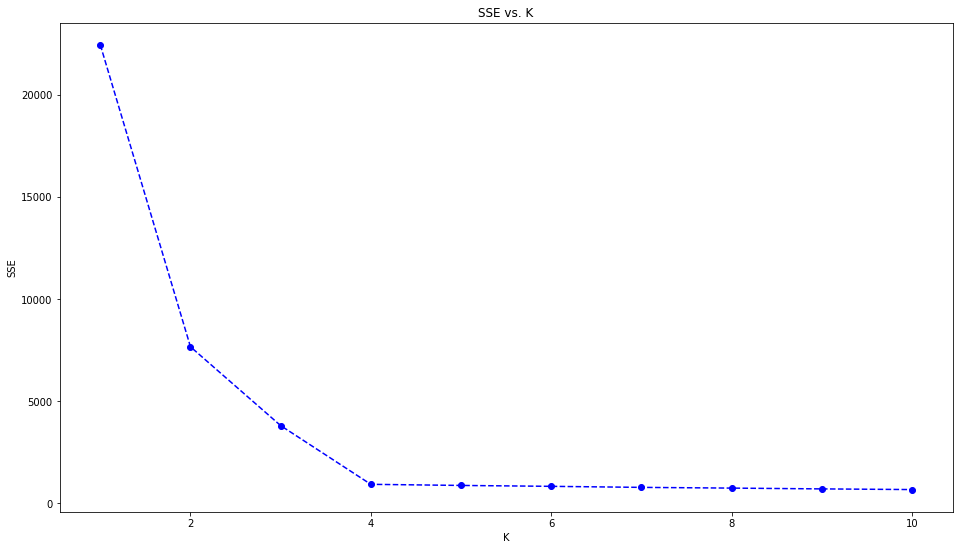

In [13]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k
scores = []
centers  =list(range(1,11))
for centre in range(1,11):
    kmeans_centre = KMeans(n_clusters=centre)
    model = kmeans_centre.fit(data)
    score_model = model.score(data)
    scores.append(abs(score_model))
    
    
    
    
#Your plot should look similar to the below
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

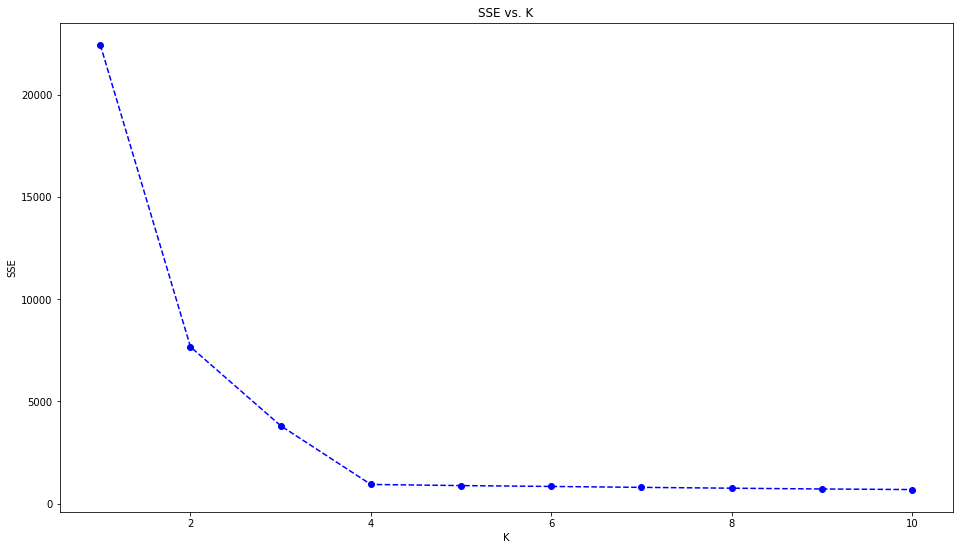

In [12]:
# Run our solution
centers, scores = h.fit_mods()

#Your plot should look similar to the below
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

`7.` Using the scree plot, how many clusters would you suggest as being in the data?  What is K?

In [14]:
value_for_k = 4#what does the plot suggest for k?

# Test your solution against ours
display.HTML(t.test_question_7(value_for_k))

That's right!  We set up the data with 4 centers, and the plot is consistent!  We can see a strong leveling off after 4 clusters, which suggests 4 clusters should be used.
